In [180]:
#Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
df = pd.read_csv('project2.csv')
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [181]:
# Checking data types of each column
df.info()
     


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


# # Checking and handling missing values

In [182]:

df.isna().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [183]:
# Checking duplicated data
df.duplicated().sum()
     

4014

In [184]:
#There are 4014 duplicate rows; will be dropped later.


df[df.duplicated(keep=False)].sort_values('job_title').head(6)
     

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
3157,2023,AI Architect,Machine Learning and AI,USD,204000,204000,United States,Senior,Full-time,In-person,United States,M
3156,2023,AI Architect,Machine Learning and AI,USD,330000,330000,United States,Senior,Full-time,In-person,United States,M
4506,2023,AI Architect,Machine Learning and AI,USD,204000,204000,United States,Senior,Full-time,In-person,United States,M
4505,2023,AI Architect,Machine Learning and AI,USD,330000,330000,United States,Senior,Full-time,In-person,United States,M
4307,2023,AI Architect,Machine Learning and AI,USD,330000,330000,United States,Senior,Full-time,In-person,United States,M
3967,2023,AI Architect,Machine Learning and AI,USD,330000,330000,United States,Senior,Full-time,In-person,United States,M


In [185]:
df.nunique()

work_year                4
job_title              125
job_category            10
salary_currency         11
salary                1507
salary_in_usd         1786
employee_residence      83
experience_level         4
employment_type          4
work_setting             3
company_location        70
company_size             3
dtype: int64

In [186]:

# Drop duplicated rows
df = df.drop_duplicates()

In [187]:

# Sanity check
df.duplicated().sum()

0

In [188]:
df.shape
# there were not any null value

(5341, 12)

In [190]:
 #Separate columns into numerical and categorical
all_columns = df.columns.to_list()
numerical = ['work_year', 'salary', 'salary_in_usd']
categorical = list(set(all_columns) - set(numerical))

In [127]:
df[numerical]

,work_year,salary,salary_in_usd
0,2023,88000,95012
1,2023,186000,186000
2,2023,81800,81800
3,2023,212000,212000
4,2023,93300,93300
...,...,...,...
9350,2021,165000,165000
9351,2020,412000,412000
9352,2021,151000,151000
9353,2020,105000,105000


In [128]:

df[numerical].describe()

,work_year,salary,salary_in_usd
count,5341.000000,5341.000000,5341.000000
mean,2022.682082,145814.937839,146258.409099
std,0.608026,67025.469452,66594.117529
min,2020.000000,14000.000000,15000.000000
25%,2022.000000,97300.000000,98506.000000
50%,2023.000000,140000.000000,140000.000000
75%,2023.000000,186200.000000,186000.000000
max,2023.000000,450000.000000,450000.000000


In [129]:
df[categorical].describe()

,employment_type,salary_currency,employee_residence,job_category,company_location,job_title,experience_level,company_size,work_setting
count,5341,5341,5341,5341,5341,5341,5341,5341,5341
unique,4,11,83,10,70,125,4,3,3
top,Full-time,USD,United States,Data Science and Research,United States,Data Engineer,Senior,M,In-person
freq,5296,4707,4255,1655,4301,1100,3444,4688,2913


<AxesSubplot:xlabel='work_year', ylabel='salary'>

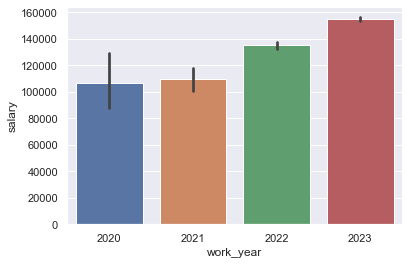

In [95]:
sns.barplot(data=df, x='work_year',  y='salary')

<AxesSubplot:xlabel='experience_level', ylabel='salary'>

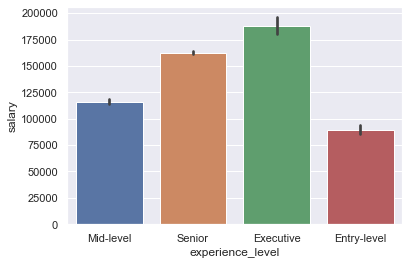

In [94]:
sns.barplot(data=df, x='experience_level',  y='salary')

<AxesSubplot:xlabel='company_size', ylabel='salary'>

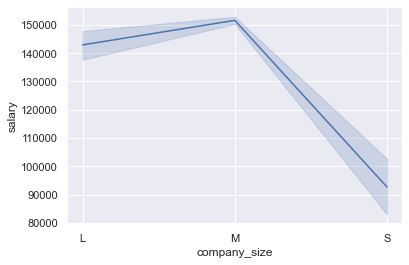

In [83]:
sns.barplot(data=df, x='company_size',  y='salary')

<AxesSubplot:xlabel='work_setting', ylabel='salary'>

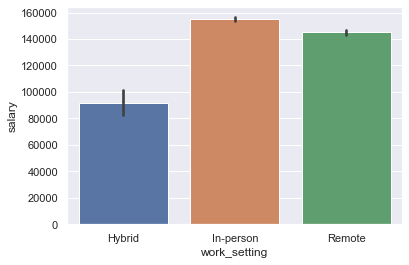

In [93]:
sns.barplot(data=df, x='work_setting',  y='salary')

# Multivariate Analysis
#Analysis 1: What is job with the highest salary in Data Science?

In [191]:
#5.4. Highest salaries by job title
title_sal_pivot = pd.pivot_table(data=df,index=['job_title'],values=['salary_in_usd'], aggfunc='max').sort_values(by=['salary_in_usd'],ascending=False)
display(title_sal_pivot)

,salary_in_usd
job_title,
Research Scientist,450000
Data Analyst,430967
Analytics Engineer,430640
Applied Machine Learning Scientist,423000
Principal Data Scientist,416000
...,...
Machine Learning Operations Engineer,60000
Sales Data Analyst,60000
Compliance Data Analyst,60000


TypeError: 'str' object is not callable

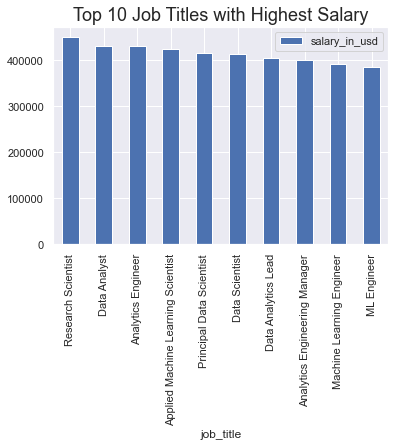

In [192]:

title_sal_pivot.head(10).plot.bar()
plt.title('Top 10 Job Titles with Highest Salary', fontsize=18)
plt.xlabel("Job Title", fontsize=14)
plt.ylabel("Salary in USD", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
     

In [193]:
dftopsalary = ['salary_in_usd', 'job_title']
df[dftopsalary].max()

salary_in_usd                             450000
job_title        Staff Machine Learning Engineer
dtype: object

In [194]:
df[dftopsalary].min()

salary_in_usd           15000
job_title        AI Architect
dtype: object

# Analysis 2: What are the top 10 data science jobs in 2023?

In [195]:

df.groupby(['work_year']).agg(
    job_title = ('job_title','count')
).reset_index()
     

,work_year,job_title
0,2020,71
1,2021,195
2,2022,1095
3,2023,3980


In [196]:

df.salary.value_counts()

100000    108
150000     87
120000     84
80000      73
200000     70
         ... 
197430      1
152380      1
92900       1
154560      1
70600       1
Name: salary, Length: 1507, dtype: int64

In [197]:
df23 = df[df["work_year"] == 2023]
df23.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [198]:
df23.job_title.value_counts().head(10)

Data Engineer                778
Data Scientist               743
Data Analyst                 551
Machine Learning Engineer    419
Analytics Engineer           158
Research Scientist           135
Data Architect                96
Research Engineer             89
ML Engineer                   77
Applied Scientist             69
Name: job_title, dtype: int64

Text(0.5, 1.0, 'Top 10 Data Science Jobs in 2023')

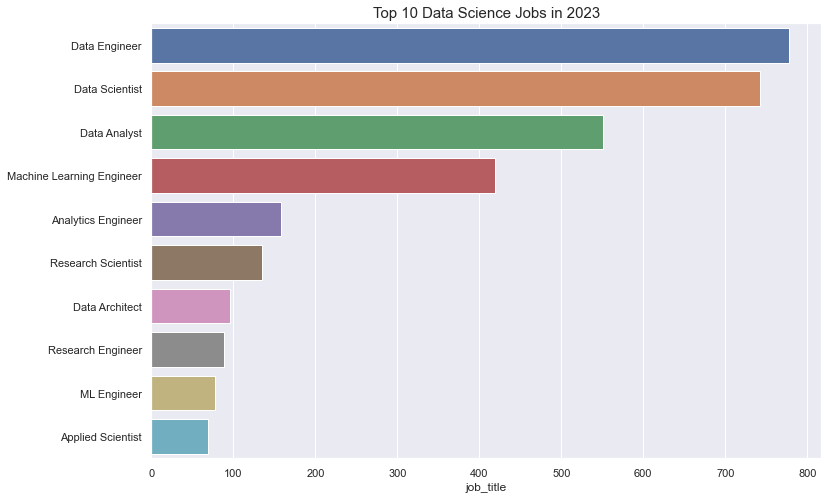

In [199]:
# Set the figure size
plt.figure(figsize = (12, 8))

# plot a bar chart
sns.barplot(x = df23["job_title"].value_counts().sort_values(ascending = False).head(10), 
            y = df23["job_title"].value_counts().sort_values(ascending = False).head(10).index)
plt.title('Top 10 Data Science Jobs in 2023', fontsize = 15)

Text(0.5, 1.0, 'Top 10 Data Science Jobs in 2022')

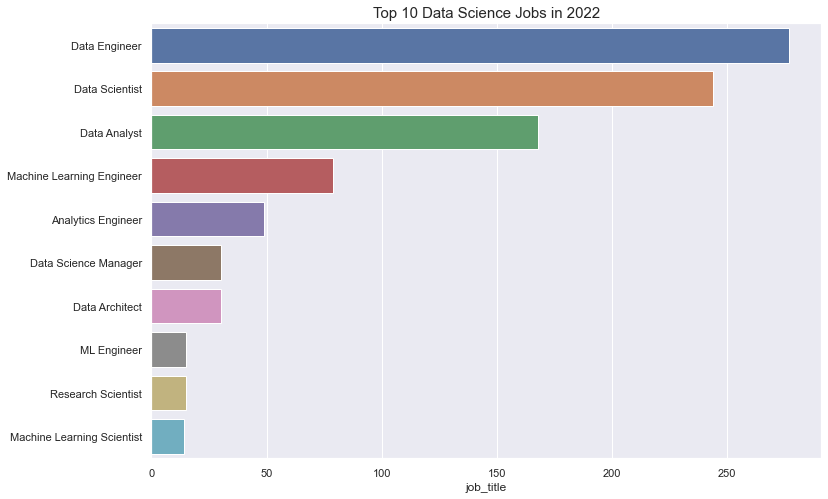

In [200]:
df22 = df[df["work_year"] == 2022]
df22.job_title.value_counts().head(10)
plt.figure(figsize = (12, 8))

# plot a bar chart
sns.barplot(x = df22["job_title"].value_counts().sort_values(ascending = False).head(10), 
            y = df22["job_title"].value_counts().sort_values(ascending = False).head(10).index)
plt.title('Top 10 Data Science Jobs in 2022', fontsize = 15)

# Analysis 3: How does the remote-ratio vary from year 2020 -2022?

Text(0.5, 1.0, 'Variation of remote ratio from 2020-2023')

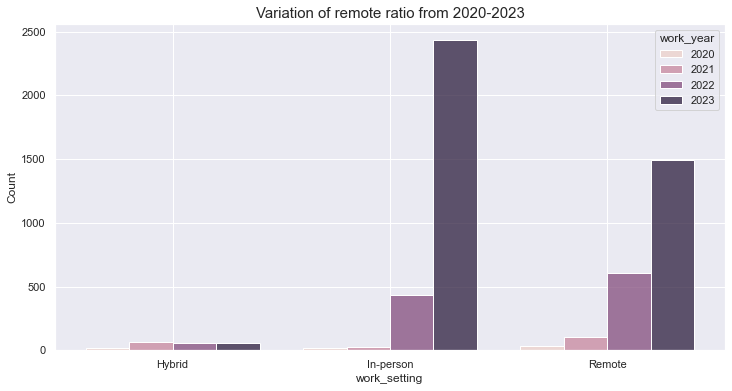

In [165]:


# Set the figure size
plt.figure(figsize = (12,6))

# plot a hist chart
sns.histplot(data = df, x = 'work_setting', hue = 'work_year', multiple = 'dodge', shrink = 0.8)
plt.title('Variation of remote ratio from 2020-2023', fontsize = 15)

# Analysis 4: Does salary of employees (salary_in_usd) depends on the exprience level?

Text(0.5, 1.0, 'Salary variation with exprience level')

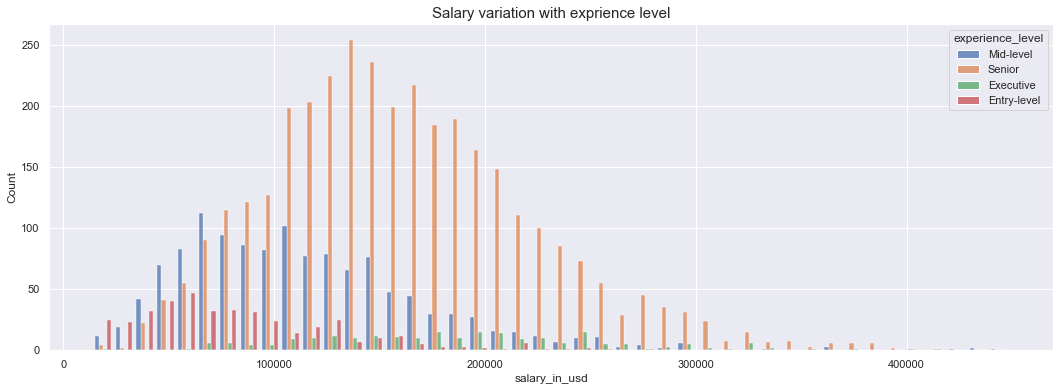

In [148]:


# Set the figure size
plt.figure(figsize = (18,6))

# plot a hist chart
sns.histplot(data = df, x = df.salary_in_usd, hue = 'experience_level', multiple = 'dodge', shrink = 0.8)
plt.title('Salary variation with exprience level', fontsize = 15)

# Analysis 5: How is the distribution of Data Science worker locations?

Text(0.5, 1.0, 'Company Locations with Most Workers')

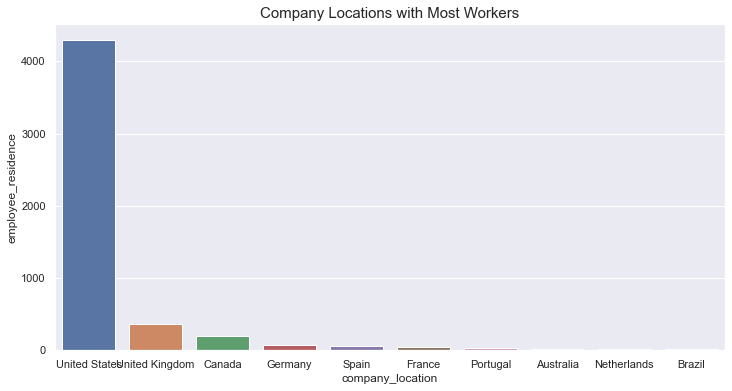

In [201]:


# Set the figure size
plt.figure(figsize = (12,6))

# plot a bar chart
sns.barplot(x = df.groupby("company_location")["employee_residence"].count().sort_values(ascending = False).head(10).index, 
            y = df.groupby("company_location")["employee_residence"].count().sort_values(ascending = False).head(10))
plt.title("Company Locations with Most Workers", fontsize = 15)
     

AttributeError: 'Figure' object has no attribute 'supxlabel'

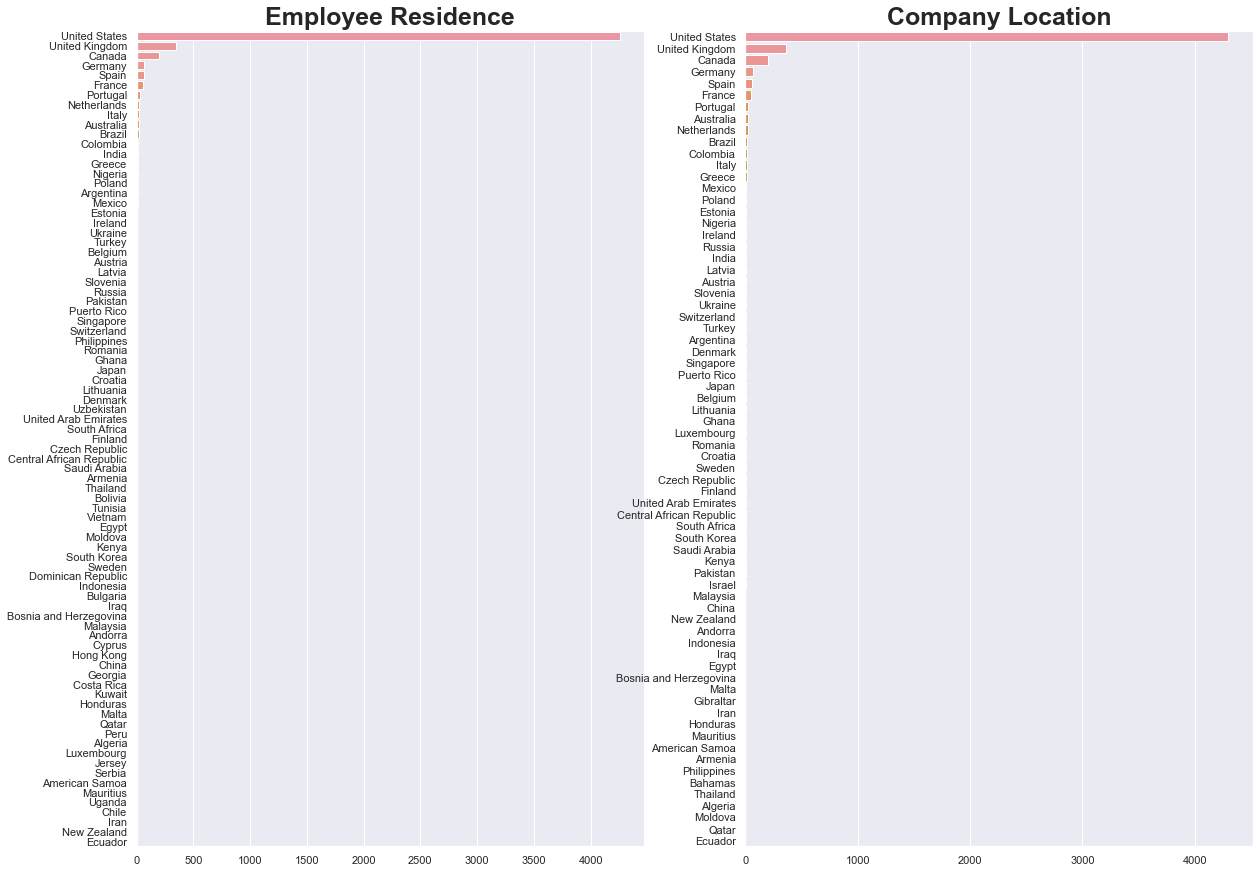

In [164]:
fig,axes=plt.subplots(1,2,figsize=(20,15))
sns.countplot(ax=axes[0],y='employee_residence', data=df, order=df['employee_residence'].value_counts().index)
sns.countplot(ax=axes[1],y='company_location', data=df,  order=df['company_location'].value_counts().index)

axes[0].set_title('Employee Residence', fontsize=25, fontweight='bold')
axes[0].set(xlabel=None)
axes[0].set(ylabel=None)
axes[1].set_title('Company Location', fontsize=25, fontweight='bold')
axes[1].set(xlabel=None)
axes[1].set(ylabel=None)

fig.supxlabel('Count', fontsize=20, fontweight='bold')
fig.supylabel('Location', fontsize=20, fontweight='bold')

plt.show()

# Analysis 5: What are the top 10 countries provide highest salary for data science jobs?


In [154]:
title_sal_pivot = pd.pivot_table(data=df,index=['job_title'],values=['salary_in_usd'], aggfunc='max').sort_values(by=['salary_in_usd'],ascending=False)
display(title_sal_pivot)

,salary_in_usd
job_title,
Research Scientist,450000
Data Analyst,430967
Analytics Engineer,430640
Applied Machine Learning Scientist,423000
Principal Data Scientist,416000
...,...
Machine Learning Operations Engineer,60000
Sales Data Analyst,60000
Compliance Data Analyst,60000


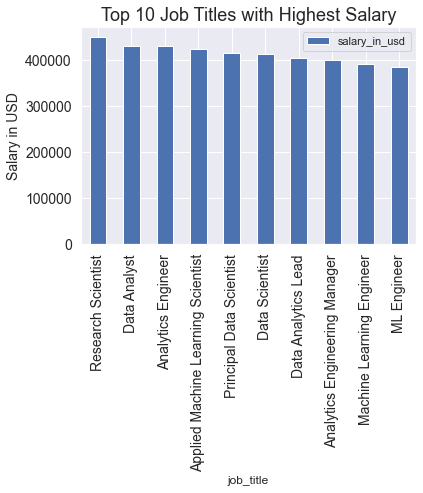

In [157]:
title_sal_pivot.head(10).plot.bar()
plt.title('Top 10 Job Titles with Highest Salary', fontsize=18)
#plt.xlabel("job_title", fontsize=14)
plt.ylabel("Salary in USD", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [168]:
top_titles = df['job_title'].value_counts()[:3]
top_titles


Data Engineer     1100
Data Scientist    1039
Data Analyst       744
Name: job_title, dtype: int64

# 3.2. Top 3 Job Title by Experience Level

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

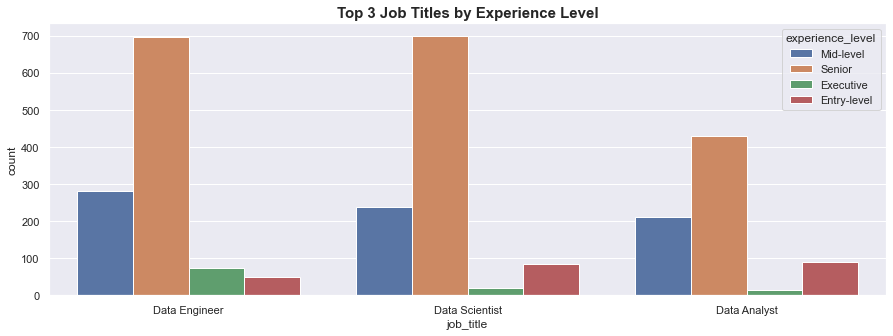

In [159]:




plt.title('Top 3 Job Titles by Experience Level', fontsize=15, fontweight='bold')
ax=sns.countplot(x='job_title', hue='experience_level', data=df, 
              order=df['job_title'].value_counts().iloc[:3].index)
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.xlabel('Job Title', fontsize=10, fontweight='bold')
plt.show()

#  Salary by Company Size

experience_level,Entry-level,Executive,Mid-level,Senior
company_size,,,,
L,101,18,144,232
M,254,198,1072,3164
S,45,7,58,48


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

<Figure size 720x360 with 0 Axes>

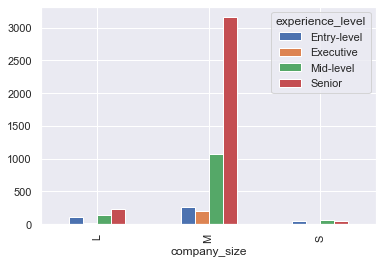

In [169]:
size_level_pivot = pd.crosstab(df['company_size'],df['experience_level'])
display(size_level_pivot)
plt.figure(figsize=(10,5))
ax=size_level_pivot.plot.bar()
for i in ax.containers:
    ax.bar_label(i)

<AxesSubplot:xlabel='company_size', ylabel='salary_in_usd'>

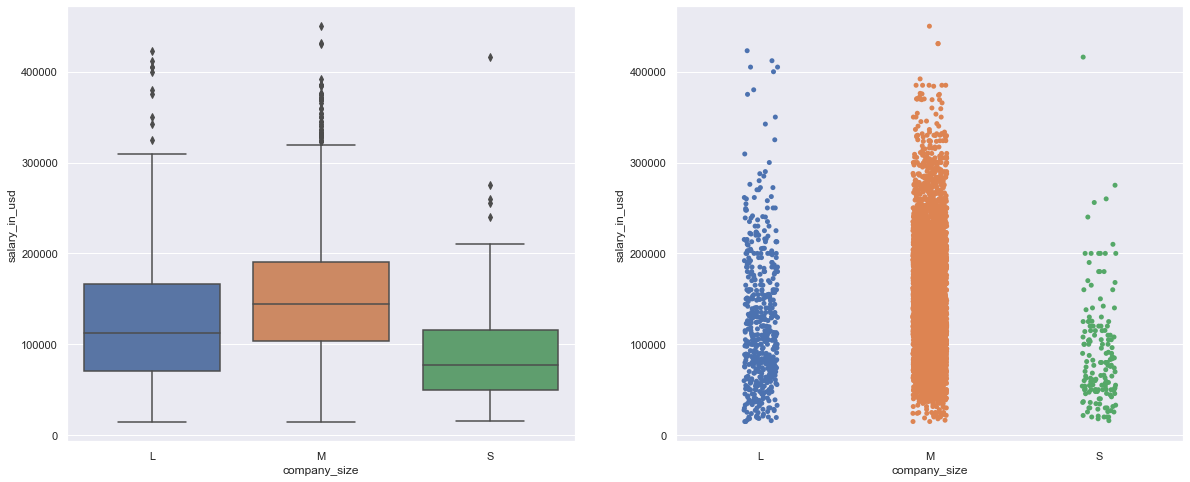

In [161]:
#5.3. Salary by Company Size
fig,axes=plt.subplots(1,2,figsize=(20,8))

sns.boxplot(ax=axes[0],x='company_size',y='salary_in_usd', data=df)
sns.stripplot(ax=axes[1],x='company_size',y='salary_in_usd', data=df)

# Distribution of salary by work year

TypeError: 'str' object is not callable

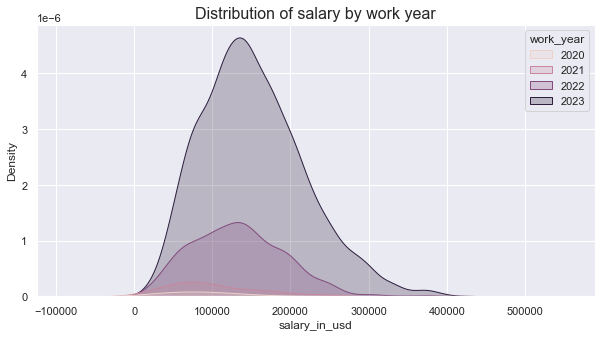

In [170]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='salary_in_usd', hue='work_year', fill=True)
plt.title("Distribution of salary by work year", fontsize=16)
plt.xlabel("Salary (in USD)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Average Salary by Company Location

In [177]:
#
loc_sal_pivot = pd.pivot_table(data=df,index=['company_location'],values=['salary_in_usd'], aggfunc='mean').sort_values(by=['salary_in_usd'],ascending=False)
display(loc_sal_pivot)

,salary_in_usd
company_location,
Qatar,300000.000000
Puerto Rico,167500.000000
Japan,165500.000000
United States,157722.150198
Canada,139550.555556
...,...
Honduras,20000.000000
Moldova,18000.000000
Ecuador,16000.000000


<AxesSubplot:ylabel='company_location'>

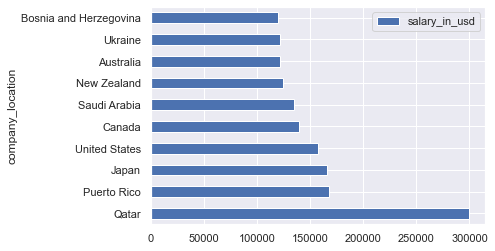

In [178]:
loc_sal_pivot.head(10).plot.barh()

In [179]:
df.shape

(5341, 12)